# Deep Learning 2021
## Assignment 7 - Regularization


## 1. Solving regularization by hand

Consider $\mathbf{x} = \left(\begin{matrix}−1 &1\end{matrix}\right)^T$ with output $y = 2$ and the network below:

![](https://dl2021luh.s3.eu-central-1.amazonaws.com/net.png)

where:
$$
\mathbf{W}_h = \left(\begin{matrix}
                    1  &  1\\
                    -1 &  2\\
                    0  & -2
        \end{matrix}\right),\\
\mathbf{W}_s = \left(\begin{matrix}1 &-1 &2\end{matrix}\right)
$$
and 
$$
Regularization\ Penalty = 0.5
$$
$$
Loss\ = 0.5 * squared\ error
$$

1. Perform a forward and backward pass without Regularization
2. From scratch, perform a backward pass using L1-Regularization.
3. Assume we update the weights using a learning rate of 0.1 . How do the new weights differ between 1. and 2. ?

Hint: Linear activation means no non-linearity is applied.

#### Solution

1. forward: $$ 
h = W_h * x = (0, 3, -2)^T\\
s = W_s * h = -7
$$
loss:
$$
loss = 0.5 * (y - s)^2 = 40.5
$$
$$
\frac{\delta loss}{\delta W_s} = (s - y) * h = (-9, 9, -18)^T
$$
$$
\frac{\delta loss}{\delta W_h} = (s - y) * W_s^T * x^T = -9 * (-1, 1;1, -1;-2, 2) = (9, -9;-9, 9; 18, -18)
$$
2. forward:
$$
h = (0, 3, -2)^T\\
s = -7
$$
loss:
$$
loss = 0.5 * (y - s)^2 + 0.5 * \sum_k|\theta_k| = 40.5 + 0.5 * 11 = 46
$$
backward:
$$
\frac{\delta loss}{\delta W_s} = (-8.5, 8.5, -17.5)^T\\
\frac{\delta loss}{\delta W_h} = (8.5, -8.5, -8.5, 8.5, 17.5, -17.5)^T
$$
3. 
without regularization:
$$
\alpha * \frac{\delta loss}{\delta W_s} = (-0.9, 0.9, -1.8)^T\\
\alpha * \frac{\delta loss}{\delta W_h} = (0.9, -0.9;-0.9, 0.9, 1.8, -1.8)^T
$$
with regularization:
$$
\alpha * \frac{\delta loss}{\delta W_s} = (-0.85, 0.85, -1.75)^T\\
\alpha * \frac{\delta loss}{\delta W_h} = (0.85, -0.85;-0.85, 0.85;1.75, -1.75)^T
$$

## 2. Dropout
1. Assume we have a neural network with ReLU activation function and want to perform a regression task. The weights are:
$
\mathbf{W}_1 = \left(\begin{matrix}
    1 & 2\\
    -1 & 1\\
    2 & -1
\end{matrix}\right)
\space
\space
\mathbf{W}_2 = \left(\begin{matrix}
    1 & 2 & -2\\
    2 & -1 & 1
\end{matrix}\right)\\
\mathbf{W}_3 = \left(\begin{matrix}
    2  & 1\\
    -1 & -1
\end{matrix}\right)
\space
\space
\mathbf{v} = \left(\begin{matrix}1 & -1\end{matrix}\right)
$
and
$
\mathbf{b}_1 = \left(\begin{matrix}
    -1\\
    1\\
    2
\end{matrix}\right)
\space
\space
\mathbf{b}_2 = \left(\begin{matrix}
    2\\
    -1
\end{matrix}\right)
\space
\space
\mathbf{b}_3 = \left(\begin{matrix}
    1\\
    1
\end{matrix}\right)
\space
\space
b_4 = 1\space.
$

Predict for the instance $x=\left(\begin{matrix}1 & 1\end{matrix}\right)^T$ twice, once using the following dropout masks and once without dropout:
$
\mu_0 = \left(\begin{matrix}
    0\\
    1
\end{matrix}\right)
\space
\space
\mu_1 = \left(\begin{matrix}
    0\\
    1\\
    1
\end{matrix}\right)
\space
\space
\mu_2 = \left(\begin{matrix}
    1\\
    1
\end{matrix}\right)
$

2. Why is dropout is not used for bias nodes?

#### Solution


1. with dropout:
$$
h_1 = ReLU(W_1 * (x \cdot \mu_0) + b_1) = ReLU(1, 2, 1)^T = (1, 2, 1)^T\\
h_2 = ReLU(W_2 * (h_1 \cdot \mu_1) + b_2) = ReLU(4, -2)^T = (4, 0)^T\\
h_3 = ReLU(W_3 * (h_2 \cdot \mu_2) + b_3) = ReLU(9, -3)^T = (9, 0)^T\\
y = ReLU(v * h_3 + b_4) = 10
$$
without:
$$
h_1 = ReLU(W_1 * x + b_1) = ReLU(2, 1, 3)^T = (2, 1, 3)^T\\
h_2 = ReLU(W_2 * h_1 + b_2) = ReLU(0, 5)^T = (0, 5)^T\\
h_3 = ReLU(W_3 * h_2 + b_3) = ReLU(6, -4)^T = (6, 0)^T\\
y = ReLU(v * h_3 + b_4) = 7
$$

### 3. Data Augmentation
Assume you have a dataset that contains speech ".wav" files. However this dataset is small. You want to build a model that reads the ".wav" files and classifies whether the speech contains they key words "Hey Sira". 
- Can you come up with data augmentation methods that could help?
- Explain why data augmentation helps with regularization.

#### Solution

Your solution goes here

## C1: Effect of Regularization

Below you find the data setup for a binary classification problem in 2D input space. Train two neural networks to gain some inuition about the effect of regularization. In particular, you should train the same model twice, while only adding L2 regularization to one of them.

Use the following network architecture:
- 3 fully connected hidden layers consisting of 64 neurons each.
- A ReLU activation after every layer except the output layer
- A fully connected output layer, mapping its 64 inputs to a single output neuron and using a Sigmoid activation to push values between 0 and 1.

Train the network using the following hyperparameters:
- Train for 1000 epochs.
- Use the Adam optimizer with a learning rate of 0.001. Add an L2 regularization penalty of 0.01 to one of your models (Hint: weight decay) .
- Use a batch size of 32.
- Use a binary cross entropy loss.


Compute the accuracy on both training and test set. Use a threshold of 0.5 to binarize the model's output.

Visualize your model's decision boundary using the given `visualize` function.

Training data:


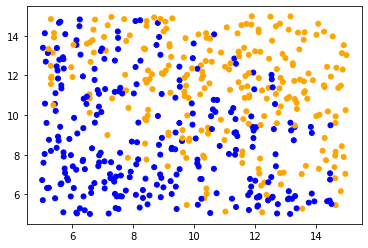

Test data:


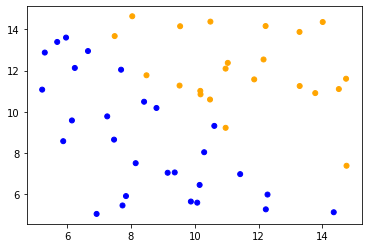

In [ ]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

torch.manual_seed(2)


def generate_data(center, spread, samples, test=False):
    x0 = torch.empty(samples, 1).uniform_(center[0] - spread, center[0] + spread)
    x1 = torch.empty(samples, 1).uniform_(center[1] - spread, center[1] + spread)
    y0 = torch.zeros(samples)
    if test: 
        f = lambda point: ((center[0]) + -point[0]) + ((center[1] + spread) + -point[1])
    else:
        f = lambda point: ((center[0]) + -point[0]) + ((center[1] + spread) + -point[1]) + 5 * torch.cos(point[0] * 10)
    y0 = torch.where(f((x0, x1)) > 5, 0, 1).squeeze()
    # print(f(x0))

    return torch.cat([x0, x1], dim=1), y0


X_train, y_train = generate_data(center=(10,10), spread=5, samples=500)
X_test, y_test = generate_data(center=(10,10), spread=5, samples=50, test=True)


def visualize(model=None):
    if model is not None:
        vis_points = torch.meshgrid(torch.arange(5, 15, 0.1), torch.arange(5, 15, 0.1))
        vis_points = torch.stack([vis_points[0].reshape(-1), vis_points[1].reshape(-1)], dim=1)
        preds = model(vis_points)
        preds = torch.where(preds > 0.5, 1, 0)
        plt.scatter(vis_points[:, 0], vis_points[:, 1], s=10, alpha=0.1, c=['orange' if target == 1 else 'blue' for target in preds])
    print('Training data:')
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=100, c=['orange' if target == 1 else 'blue' for target in y_train])
    plt.show()

    print('Test data:')
    if model is not None:
        plt.scatter(vis_points[:, 0], vis_points[:, 1], s=10, alpha=0.1, c=['orange' if target == 1 else 'blue' for target in preds])
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', s=100, c=['orange' if target == 1 else 'blue' for target in y_test])
    plt.show()

visualize()

ds_train = torch.utils.data.TensorDataset(X_train, y_train)
ds_test = torch.utils.data.TensorDataset(X_test, y_test)

Solution:

In [ ]:
batch_size = 32
train_dl = torch.utils.data.DataLoader(ds_train, batch_size=batch_size, shuffle=True, num_workers=2)
test_dl = torch.utils.data.DataLoader(ds_test, batch_size=batch_size, num_workers=2)

In [ ]:
import torch.nn as nn
import torch.optim as optim

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()

        self.fc1 = nn.Sequential(
            nn.Linear(in_features=2, out_features=64),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=64, out_features=64),
            nn.ReLU()
        )
        self.fc3 = nn.Sequential(
            nn.Linear(in_features=64, out_features=64),
            nn.ReLU()
        )
        self.fc4 = nn.Linear(in_features=64, out_features=1)
        self.sig = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        out = self.sig(x).view(-1)
        return out

In [ ]:
net_with = net()

optimizer_with = optim.Adam(net_with.parameters(), lr=0.001, weight_decay=0.01)
loss_function = nn.BCELoss()

In [ ]:
for epoch in range(1000):
    train_loss = 0
    train_accuracy = 0
    
    for step, (batch_x, batch_y) in enumerate(train_dl):

        batch_y = batch_y.float()
        output = net_with(batch_x)
        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer_with.zero_grad()
        loss.backward()
        optimizer_with.step()

        batch_len = batch_y.size()[0]
        y_predict = output
        y_correct = 0
        for item in range(batch_len):
            if output[item] > 0.5:
                y_predict[item] = 1
            else:
                y_predict[item] = 0
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        train_accuracy = train_accuracy + y_correct / batch_len
    train_loss = train_loss / len(train_dl)
    train_accuracy = train_accuracy / len(train_dl)
    if epoch % 50 == 0:
        print("train loss of %d epoch: %.4f" % (epoch, train_loss))
        print("train accuracy of %d epoch: %.4f" % (epoch, train_accuracy))

train loss of 0 epoch: 0.6912
train accuracy of 0 epoch: 0.5207
train loss of 50 epoch: 0.5463
train accuracy of 50 epoch: 0.6973
train loss of 100 epoch: 0.4998
train accuracy of 100 epoch: 0.7355
train loss of 150 epoch: 0.4911
train accuracy of 150 epoch: 0.7504
train loss of 200 epoch: 0.4979
train accuracy of 200 epoch: 0.7371
train loss of 250 epoch: 0.5197
train accuracy of 250 epoch: 0.7328
train loss of 300 epoch: 0.5132
train accuracy of 300 epoch: 0.7320
train loss of 350 epoch: 0.5101
train accuracy of 350 epoch: 0.7363
train loss of 400 epoch: 0.4979
train accuracy of 400 epoch: 0.7297
train loss of 450 epoch: 0.4908
train accuracy of 450 epoch: 0.7324
train loss of 500 epoch: 0.5064
train accuracy of 500 epoch: 0.7098
train loss of 550 epoch: 0.5111
train accuracy of 550 epoch: 0.7277
train loss of 600 epoch: 0.5000
train accuracy of 600 epoch: 0.7430
train loss of 650 epoch: 0.5247
train accuracy of 650 epoch: 0.7281
train loss of 700 epoch: 0.4915
train accuracy of 700 

In [ ]:
test_loss = 0
test_accuracy = 0
    
for step, (batch_x, batch_y) in enumerate(test_dl):

    batch_y = batch_y.float()
    output = net_with(batch_x)
    loss = loss_function(output, batch_y)
    test_loss = test_loss + loss
    n = step
    batch_len = batch_y.size()[0]
    y_predict = output
    y_correct = 0
    for item in range(batch_len):
        if output[item] > 0.5:
            y_predict[item] = 1
        else:
            y_predict[item] = 0
        if y_predict[item] == batch_y[item]:
            y_correct = y_correct + 1
    test_accuracy = test_accuracy + y_correct / batch_len
test_loss = test_loss / len(test_dl)
test_accuracy = test_accuracy / len(test_dl)
print("test loss: %.04f" % test_loss)
print("test accuracy: %.04f" % test_accuracy)

test loss: 0.3425
test accuracy: 0.8507


Training data:


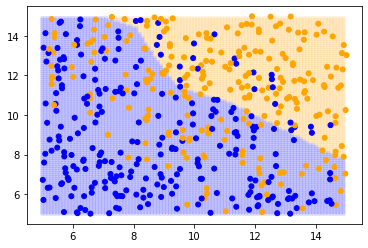

Test data:


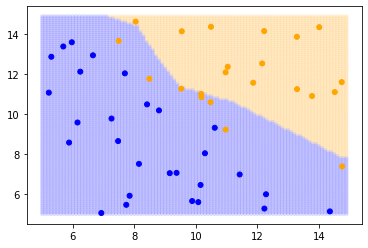

In [ ]:
visualize(net_with)

In [ ]:
net_without = net()

optimizer_without = optim.Adam(net_without.parameters(), lr=0.001, weight_decay=0)
loss_function = nn.BCELoss()

In [ ]:
for epoch in range(1000):
    train_loss = 0
    train_accuracy = 0
    
    for step, (batch_x, batch_y) in enumerate(train_dl):

        
        batch_y = batch_y.float()
        output = net_without(batch_x)

        loss = loss_function(output, batch_y)
        train_loss = train_loss + loss
        optimizer_without.zero_grad()
        loss.backward()
        optimizer_without.step()
        n = step

        batch_len = batch_y.size()[0]
        y_predict = output
        y_correct = 0
        for item in range(batch_len):
            if output[item] > 0.5:
                y_predict[item] = 1
            else:
                y_predict[item] = 0
            if y_predict[item] == batch_y[item]:
                y_correct = y_correct + 1
        train_accuracy = train_accuracy + y_correct / batch_len
    train_loss = train_loss / len(train_dl)
    train_accuracy = train_accuracy / len(train_dl)
    if epoch % 50 == 0:
        print("train loss of %d epoch: %.4f" % (epoch, train_loss))
        print("train accuracy of %d epoch: %.4f" % (epoch, train_accuracy))

train loss of 0 epoch: 0.6894
train accuracy of 0 epoch: 0.5379
train loss of 50 epoch: 0.5039
train accuracy of 50 epoch: 0.7375
train loss of 100 epoch: 0.4777
train accuracy of 100 epoch: 0.7539
train loss of 150 epoch: 0.4809
train accuracy of 150 epoch: 0.7512
train loss of 200 epoch: 0.4739
train accuracy of 200 epoch: 0.7496
train loss of 250 epoch: 0.4686
train accuracy of 250 epoch: 0.7723
train loss of 300 epoch: 0.4708
train accuracy of 300 epoch: 0.7676
train loss of 350 epoch: 0.4543
train accuracy of 350 epoch: 0.7656
train loss of 400 epoch: 0.4457
train accuracy of 400 epoch: 0.7746
train loss of 450 epoch: 0.4360
train accuracy of 450 epoch: 0.7699
train loss of 500 epoch: 0.4512
train accuracy of 500 epoch: 0.7555
train loss of 550 epoch: 0.4493
train accuracy of 550 epoch: 0.7680
train loss of 600 epoch: 0.4229
train accuracy of 600 epoch: 0.7785
train loss of 650 epoch: 0.4291
train accuracy of 650 epoch: 0.7793
train loss of 700 epoch: 0.4351
train accuracy of 700 

In [ ]:
test_loss = 0
test_accuracy = 0
    
for step, (batch_x, batch_y) in enumerate(test_dl):

    batch_y = batch_y.float()
    output = net_without(batch_x)
    loss = loss_function(output, batch_y)
    test_loss = test_loss + loss
    n = step
    batch_len = batch_y.size()[0]
    y_predict = output
    y_correct = 0
    for item in range(batch_len):
        if output[item] > 0.5:
            y_predict[item] = 1
        else:
            y_predict[item] = 0
        if y_predict[item] == batch_y[item]:
            y_correct = y_correct + 1
    test_accuracy = test_accuracy + y_correct / batch_len
test_loss = test_loss / len(test_dl)
test_accuracy = test_accuracy / len(test_dl)


print("test loss: %.04f" % test_loss)
print("test accuracy: %.04f" % test_accuracy)

test loss: 0.3593
test accuracy: 0.8316


Training data:


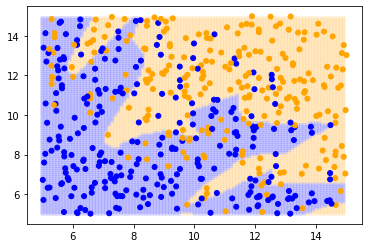

Test data:


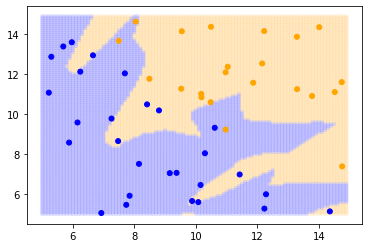

In [ ]:
visualize(net_without)